In [96]:
%matplotlib inline

In [97]:
import pandas as pd
import warnings
import numpy as np
# Ignore all warnings
warnings.filterwarnings("ignore")

In [98]:
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('final data.csv')
df

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,max_consumption
0,1,3.78,2076,CL,2012-07-01,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,1.263
1,1,3.78,2076,GC,2012-07-01,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,1.245
2,1,3.78,2076,GG,2012-07-01,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.156
3,1,3.78,2076,CL,2012-07-02,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,1.250
4,1,3.78,2076,GC,2012-07-02,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,1.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268552,300,3.36,2086,GC,2013-06-29,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,2.403
268553,300,3.36,2086,GG,2013-06-29,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
268554,300,3.36,2086,CL,2013-06-30,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,2.508
268555,300,3.36,2086,GC,2013-06-30,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,2.963


In [100]:
selected_GG = pd.read_csv('selected_GG.csv')
selected_GC = pd.read_csv('selected_GC.csv')
# selected_GG

In [101]:
df_new = df[df['Consumption Category']=='GC']

In [102]:
df_new['date'] = pd.to_datetime(df_new['date'])
df_new
# df_opt = df_new

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,max_consumption
1,1,3.78,2076,GC,2012-07-01,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,1.245
4,1,3.78,2076,GC,2012-07-02,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,1.056
7,1,3.78,2076,GC,2012-07-03,0.092,0.076,0.318,0.088,0.061,...,0.330,0.654,0.406,0.141,0.073,0.190,0.902,0.098,0.066,1.733
10,1,3.78,2076,GC,2012-07-04,0.081,0.082,0.306,0.098,0.725,...,0.403,0.204,0.286,0.203,0.521,0.259,1.306,0.259,0.260,1.948
13,1,3.78,2076,GC,2012-07-05,0.445,0.255,0.138,0.115,0.071,...,0.240,0.506,0.237,0.257,0.462,0.414,0.932,0.070,0.094,1.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268543,300,3.36,2086,GC,2013-06-26,0.124,0.157,0.131,0.150,0.150,...,0.614,0.458,0.535,0.427,0.315,0.253,0.430,0.881,0.853,1.992
268546,300,3.36,2086,GC,2013-06-27,0.250,0.153,0.191,0.152,0.176,...,0.696,0.662,0.584,0.682,0.666,0.630,0.417,0.295,0.607,1.223
268549,300,3.36,2086,GC,2013-06-28,0.548,0.817,0.155,0.187,0.171,...,1.319,1.259,0.921,0.667,0.495,0.486,0.389,0.448,0.269,2.283
268552,300,3.36,2086,GC,2013-06-29,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,2.403


In [103]:
# coverting half hourly energy into load 60/30 == *2
columns_to_multiply = df_new.columns[5:53]
df_new[columns_to_multiply] = df_new[columns_to_multiply] * 2
column_to_drop = 'max_consumption'
df_new = df_new.drop(column_to_drop, axis=1)
df_opt = df_new
df_temp = df_new
df_new 

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
1,1,3.78,2076,GC,2012-07-01,1.710,1.572,1.208,1.088,1.194,...,0.658,0.748,0.894,1.098,0.272,0.576,0.362,1.302,0.180,0.136
4,1,3.78,2076,GC,2012-07-02,0.618,0.164,0.118,0.194,0.580,...,1.392,0.706,0.928,0.458,1.622,0.444,0.612,2.068,0.272,0.134
7,1,3.78,2076,GC,2012-07-03,0.184,0.152,0.636,0.176,0.122,...,0.536,0.660,1.308,0.812,0.282,0.146,0.380,1.804,0.196,0.132
10,1,3.78,2076,GC,2012-07-04,0.162,0.164,0.612,0.196,1.450,...,1.270,0.806,0.408,0.572,0.406,1.042,0.518,2.612,0.518,0.520
13,1,3.78,2076,GC,2012-07-05,0.890,0.510,0.276,0.230,0.142,...,0.416,0.480,1.012,0.474,0.514,0.924,0.828,1.864,0.140,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268543,300,3.36,2086,GC,2013-06-26,0.248,0.314,0.262,0.300,0.300,...,1.020,1.228,0.916,1.070,0.854,0.630,0.506,0.860,1.762,1.706
268546,300,3.36,2086,GC,2013-06-27,0.500,0.306,0.382,0.304,0.352,...,1.308,1.392,1.324,1.168,1.364,1.332,1.260,0.834,0.590,1.214
268549,300,3.36,2086,GC,2013-06-28,1.096,1.634,0.310,0.374,0.342,...,3.128,2.638,2.518,1.842,1.334,0.990,0.972,0.778,0.896,0.538
268552,300,3.36,2086,GC,2013-06-29,0.342,1.664,0.880,1.490,0.298,...,0.872,0.766,0.808,0.734,0.796,0.700,0.456,0.340,0.278,0.342


In [104]:
test_df = df_new[df_new['Customer']==1]

In [105]:
# test_df['date'] = pd.to_datetime(test_df['date'])

In [106]:
test_df

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
1,1,3.78,2076,GC,2012-07-01,1.710,1.572,1.208,1.088,1.194,...,0.658,0.748,0.894,1.098,0.272,0.576,0.362,1.302,0.180,0.136
4,1,3.78,2076,GC,2012-07-02,0.618,0.164,0.118,0.194,0.580,...,1.392,0.706,0.928,0.458,1.622,0.444,0.612,2.068,0.272,0.134
7,1,3.78,2076,GC,2012-07-03,0.184,0.152,0.636,0.176,0.122,...,0.536,0.660,1.308,0.812,0.282,0.146,0.380,1.804,0.196,0.132
10,1,3.78,2076,GC,2012-07-04,0.162,0.164,0.612,0.196,1.450,...,1.270,0.806,0.408,0.572,0.406,1.042,0.518,2.612,0.518,0.520
13,1,3.78,2076,GC,2012-07-05,0.890,0.510,0.276,0.230,0.142,...,0.416,0.480,1.012,0.474,0.514,0.924,0.828,1.864,0.140,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1,3.78,2076,GC,2013-06-26,1.630,1.730,1.860,1.714,0.898,...,0.392,0.480,0.422,0.448,0.504,1.276,0.464,0.628,1.388,0.058
1084,1,3.78,2076,GC,2013-06-27,0.214,0.056,0.322,0.264,0.234,...,0.510,0.420,0.482,0.416,1.168,0.242,0.228,0.378,1.492,0.158
1087,1,3.78,2076,GC,2013-06-28,0.144,0.154,0.152,0.140,0.162,...,0.512,0.368,0.650,0.526,0.978,0.530,0.204,0.896,2.384,1.056
1090,1,3.78,2076,GC,2013-06-29,1.194,1.052,1.188,0.248,0.352,...,0.470,0.364,0.558,0.382,0.872,0.890,0.172,0.290,1.268,0.200


In [107]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Autumn'
    elif 6 <= month <= 8:
        return 'Winter'
    elif 9 <= month <= 11:
        return 'Spring'
    else:
        return 'Summer'

# Extract the month from the 'Date' column and apply the get_season function
test_df['Month'] = test_df['date'].dt.month
test_df['Season'] = test_df['Month'].apply(get_season)

In [108]:
test_df

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,Season
1,1,3.78,2076,GC,2012-07-01,1.710,1.572,1.208,1.088,1.194,...,0.894,1.098,0.272,0.576,0.362,1.302,0.180,0.136,7,Winter
4,1,3.78,2076,GC,2012-07-02,0.618,0.164,0.118,0.194,0.580,...,0.928,0.458,1.622,0.444,0.612,2.068,0.272,0.134,7,Winter
7,1,3.78,2076,GC,2012-07-03,0.184,0.152,0.636,0.176,0.122,...,1.308,0.812,0.282,0.146,0.380,1.804,0.196,0.132,7,Winter
10,1,3.78,2076,GC,2012-07-04,0.162,0.164,0.612,0.196,1.450,...,0.408,0.572,0.406,1.042,0.518,2.612,0.518,0.520,7,Winter
13,1,3.78,2076,GC,2012-07-05,0.890,0.510,0.276,0.230,0.142,...,1.012,0.474,0.514,0.924,0.828,1.864,0.140,0.188,7,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1,3.78,2076,GC,2013-06-26,1.630,1.730,1.860,1.714,0.898,...,0.422,0.448,0.504,1.276,0.464,0.628,1.388,0.058,6,Winter
1084,1,3.78,2076,GC,2013-06-27,0.214,0.056,0.322,0.264,0.234,...,0.482,0.416,1.168,0.242,0.228,0.378,1.492,0.158,6,Winter
1087,1,3.78,2076,GC,2013-06-28,0.144,0.154,0.152,0.140,0.162,...,0.650,0.526,0.978,0.530,0.204,0.896,2.384,1.056,6,Winter
1090,1,3.78,2076,GC,2013-06-29,1.194,1.052,1.188,0.248,0.352,...,0.558,0.382,0.872,0.890,0.172,0.290,1.268,0.200,6,Winter


In [109]:
test_df = test_df.groupby('Season').mean()

In [110]:
test_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month
Season,,,,,,,,,,,,,,,,,,,,,
Autumn,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.463783,0.465826,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000
Spring,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.542659,0.517341,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000
Summer,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.468333,0.455022,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000
Winter,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.601543,0.602022,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087


In [111]:
customers = df_new['Customer'].unique()

In [112]:
customers.sort()

In [113]:
season_df_list = []

In [114]:
for c in customers:
    test_df = df_new[df_new['Customer']==c]
    test_df['Month'] = test_df['date'].dt.month
    test_df['Season'] = test_df['Month'].apply(get_season)
    test_df = test_df.groupby('Season').mean()
    season_df_list.append(test_df)


In [115]:
final_season_df = pd.concat(season_df_list, ignore_index=True)

In [116]:
final_season_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month
0,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.463783,0.465826,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000
1,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.542659,0.517341,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000
2,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.468333,0.455022,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000
3,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.601543,0.602022,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087
4,2.0,1.62,2259.0,0.391065,0.347000,0.334913,0.341565,0.364022,0.311478,0.312652,...,1.140370,1.112543,1.023326,0.958130,0.857978,0.665500,0.593457,0.536326,0.454174,4.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,299.0,1.00,2076.0,0.710652,0.597804,0.573326,0.580761,0.573217,0.574261,0.583391,...,2.839674,2.744500,2.669761,2.487435,2.097043,1.807913,1.371457,1.045522,0.865457,7.01087
1196,300.0,3.36,2086.0,1.251326,0.786370,0.577217,0.514848,0.460000,0.830304,0.869826,...,1.295130,1.272239,1.162717,1.130630,1.053957,1.055848,1.114500,1.041457,1.379804,4.00000
1197,300.0,3.36,2086.0,1.593934,1.011648,0.513758,0.426923,0.392945,0.375890,0.371187,...,1.526440,1.422308,1.368330,1.359495,1.316374,1.173912,1.350703,1.455560,1.854220,10.00000
1198,300.0,3.36,2086.0,2.076822,1.008756,0.627267,0.524333,0.500844,0.486800,0.481267,...,1.720956,1.583244,1.545111,1.469356,1.328911,1.238400,1.169511,1.081467,2.128200,5.10000


In [117]:
temp_lst = []
for c in customers :
    temp_lst.append('Autumn')
    temp_lst.append('Spring')
    temp_lst.append('Summer')
    temp_lst.append('Winter')

In [118]:
# len(temp_lst)
# temp_lst


In [119]:
final_season_df['seasons'] = temp_lst

In [120]:
final_season_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,seasons
0,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.465826,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000,Autumn
1,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.517341,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000,Spring
2,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.455022,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000,Summer
3,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.602022,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087,Winter
4,2.0,1.62,2259.0,0.391065,0.347000,0.334913,0.341565,0.364022,0.311478,0.312652,...,1.112543,1.023326,0.958130,0.857978,0.665500,0.593457,0.536326,0.454174,4.00000,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,299.0,1.00,2076.0,0.710652,0.597804,0.573326,0.580761,0.573217,0.574261,0.583391,...,2.744500,2.669761,2.487435,2.097043,1.807913,1.371457,1.045522,0.865457,7.01087,Winter
1196,300.0,3.36,2086.0,1.251326,0.786370,0.577217,0.514848,0.460000,0.830304,0.869826,...,1.272239,1.162717,1.130630,1.053957,1.055848,1.114500,1.041457,1.379804,4.00000,Autumn
1197,300.0,3.36,2086.0,1.593934,1.011648,0.513758,0.426923,0.392945,0.375890,0.371187,...,1.422308,1.368330,1.359495,1.316374,1.173912,1.350703,1.455560,1.854220,10.00000,Spring
1198,300.0,3.36,2086.0,2.076822,1.008756,0.627267,0.524333,0.500844,0.486800,0.481267,...,1.583244,1.545111,1.469356,1.328911,1.238400,1.169511,1.081467,2.128200,5.10000,Summer


In [121]:
# final_season_df['seasonal_sum'] = final_season_df.iloc[:, 3:50].sum(axis=1)
    

In [122]:
column_index = final_season_df.columns.get_loc('00:00')
column_index

50

In [123]:
final_season_df['seasonal_sum'] = final_season_df.iloc[:, 3:51].sum(axis=1)

In [124]:
final_season_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,seasons,seasonal_sum
0,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000,Autumn,26.527652
1,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000,Spring,27.150945
2,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000,Summer,25.788489
3,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087,Winter,36.168739
4,2.0,1.62,2259.0,0.391065,0.347000,0.334913,0.341565,0.364022,0.311478,0.312652,...,1.023326,0.958130,0.857978,0.665500,0.593457,0.536326,0.454174,4.00000,Autumn,28.716391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,299.0,1.00,2076.0,0.710652,0.597804,0.573326,0.580761,0.573217,0.574261,0.583391,...,2.669761,2.487435,2.097043,1.807913,1.371457,1.045522,0.865457,7.01087,Winter,72.332652
1196,300.0,3.36,2086.0,1.251326,0.786370,0.577217,0.514848,0.460000,0.830304,0.869826,...,1.162717,1.130630,1.053957,1.055848,1.114500,1.041457,1.379804,4.00000,Autumn,49.983696
1197,300.0,3.36,2086.0,1.593934,1.011648,0.513758,0.426923,0.392945,0.375890,0.371187,...,1.368330,1.359495,1.316374,1.173912,1.350703,1.455560,1.854220,10.00000,Spring,52.791626
1198,300.0,3.36,2086.0,2.076822,1.008756,0.627267,0.524333,0.500844,0.486800,0.481267,...,1.545111,1.469356,1.328911,1.238400,1.169511,1.081467,2.128200,5.10000,Summer,53.392378


In [125]:
columns_to_copy = ['Customer', 'seasonal_sum','seasons']
temp_data = pd.DataFrame()
# Store the selected columns from df1 into df2
temp_data[columns_to_copy] = final_season_df[columns_to_copy]

In [126]:
temp_data

,Customer,seasonal_sum,seasons
0,1.0,26.527652,Autumn
1,1.0,27.150945,Spring
2,1.0,25.788489,Summer
3,1.0,36.168739,Winter
4,2.0,28.716391,Autumn
...,...,...,...
1195,299.0,72.332652,Winter
1196,300.0,49.983696,Autumn
1197,300.0,52.791626,Spring
1198,300.0,53.392378,Summer


In [127]:
test_data = temp_data[temp_data['Customer']==1]
test_data

,Customer,seasonal_sum,seasons
0,1.0,26.527652,Autumn
1,1.0,27.150945,Spring
2,1.0,25.788489,Summer
3,1.0,36.168739,Winter


In [128]:
sum_of_seasonal_mean = test_data['seasonal_sum'].sum()/4
sum_of_seasonal_mean

28.908956312045444

In [129]:
seasonal_sum_list_1 = test_data['seasonal_sum'].tolist()
seasonal_sum_list_1

[26.52765217391304, 27.150945054945055, 25.788488888888892, 36.16873913043479]

In [130]:
var =  np.var(seasonal_sum_list_1, ddof=1)
var

23.73432549584687

In [131]:
# population_variance = np.var(seasonal_sum_list_1)
# population_variance


In [132]:
temp_ls = []
for c in customers:
    test_data = temp_data[temp_data['Customer']==c]
    sum_of_seasonal_mean = test_data['seasonal_sum'].sum()/4
    seasonal_sum_list_1 = test_data['seasonal_sum'].tolist()
    var =  np.var(seasonal_sum_list_1, ddof=1)
    temp_ls.append(var)
    

In [133]:
len(temp_ls)


300

In [201]:
temp_ls

[23.73432549584687,
 3.699624608749632,
 22.019018054998128,
 3.610919524277236,
 96.54789250348655,
 124.3653824861088,
 16.45172791753276,
 84.8228264675404,
 65.13487152459452,
 20.958164185358328,
 17.670416932779307,
 4.60723012149447,
 212.83332401203975,
 8.489080800818272,
 4.161860721917031,
 237.6935768966555,
 70.15509032752168,
 23.379085836039938,
 3.1997641520653684,
 232.1806417464492,
 9.959088292164404,
 102.64313573492522,
 6.9338557245444425,
 15.916599323192154,
 174.96453571051475,
 658.7963267758613,
 55.32543984522104,
 4.958259396465459,
 78.81953314560663,
 27.468912880974823,
 212.09156525676954,
 15.6352241335563,
 106.9986749376172,
 130.85005187765992,
 40.49153535346935,
 45.43462465660554,
 1.0241514737596764,
 39.72186882816392,
 32.59323011941864,
 15.51931632623212,
 4.794144177226831,
 13.763560183590855,
 8.9408000931866,
 59.540146537305894,
 1.5679462672191236,
 1.4468679271666043,
 12.464960334580226,
 22.547106509122433,
 42.8816453716538,
 3.721

In [135]:
var_df = pd.DataFrame()

In [136]:
var_df['Customers']= customers
var_df['variance']= temp_ls
var_df

,Customers,variance
0,1,23.734325
1,2,3.699625
2,3,22.019018
3,4,3.610920
4,5,96.547893
...,...,...
295,296,7.059181
296,297,5.077020
297,298,3.522968
298,299,158.455843


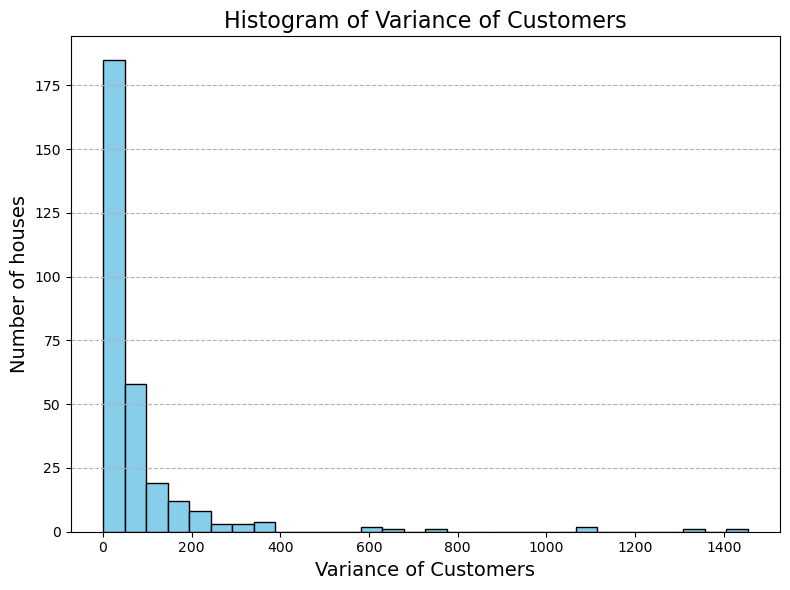

In [205]:
# plt.bar(temp_ls, customers, width=25,color = 'darkblue',edgecolor='black')  # Adjust the width as needed

# # Set labels and title
# plt.xlabel('Variance of Customers',fontsize=14)
# plt.ylabel('Number of Customers',fontsize=14)
# plt.title('Histogram of Variance of Customers',fontsize=14)
# # # plt.grid(True, linestyle='--', alpha=0.5)
# # plt.xticks(fontsize=12)  # Set xticks fontsize
# # plt.yticks(fontsize=12)  # Set yticks fontsize
# # plt.tight_layout()  # Adjust layout to prevent clipping of labels
# # Show the plot
# plt.show()

# Create a histogram from the list
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.hist(temp_ls, bins=30, color='skyblue', edgecolor='black')  # Adjust colors and bins
plt.xlabel('Variance of Customers', fontsize=14)  # Set xlabel and fontsize
plt.ylabel('Number of houses', fontsize=14)  # Set ylabel and fontsize
plt.title('Histogram of Variance of Customers', fontsize=16)  # Set title and fontsize
plt.grid(axis='y', linestyle='--')  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('histogram_of_Variance_of_Customers.png')  # Save the plot as an image
plt.show()  # Show the plot

In [138]:
selected_houses= var_df[var_df['variance'] > 200]

In [139]:
selected_houses.reset_index()

,index,Customers,variance
0,12,13,212.833324
1,15,16,237.693577
2,19,20,232.180642
3,25,26,658.796327
4,30,31,212.091565
5,71,72,239.637773
6,91,92,268.954446
7,93,94,306.145715
8,95,96,1454.243511
9,103,104,363.550169


In [140]:
selected_houses.count()

Customers    26
variance     26
dtype: int64

In [141]:
selected_houses = selected_houses.drop('variance', axis=1)

In [142]:
# 94 96 194 221 232 279 293 
selected_houses.reset_index()

,index,Customers
0,12,13
1,15,16
2,19,20
3,25,26
4,30,31
5,71,72
6,91,92
7,93,94
8,95,96
9,103,104


In [143]:
# selected_houses.to_csv('selected_houses.csv', index=False)

In [144]:
df_new = df_new.groupby('Customer').mean()

In [145]:
# df_new.reset_index()
# print("Column Names:", df_new.columns.tolist())
reset_df = df_new.reset_index()
reset_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
0,1,3.78,2076.0,0.474411,0.457649,0.441386,0.431556,0.407271,0.496142,1.580663,...,0.549277,0.519293,0.510334,0.502701,0.508871,0.440055,0.465271,1.375441,1.315408,0.501567
1,2,1.62,2259.0,0.420366,0.370655,0.357408,0.332352,0.333662,0.308732,0.307859,...,1.164789,1.196183,1.165324,1.104479,0.995303,0.926134,0.781993,0.663746,0.571859,0.494042
2,3,1.00,2263.0,0.292986,0.232860,0.194932,0.161052,0.135978,0.132088,0.125529,...,0.304225,0.350071,0.335721,0.341699,0.349112,0.340203,0.365189,0.338690,0.284104,0.280049
3,4,1.00,2220.0,0.245079,0.229255,0.219047,0.219452,0.213074,0.214893,0.218882,...,0.788800,0.726548,0.689545,0.617458,0.577107,0.505496,0.431600,0.395748,0.334405,0.283063
4,5,1.00,2261.0,0.262488,0.245890,0.238652,0.231123,0.230000,0.226658,0.204559,...,0.887211,0.842997,0.831321,0.781633,0.704411,0.613605,0.491523,0.440175,0.365699,0.304318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1.08,2087.0,0.124170,0.115205,0.112274,0.107901,0.105951,0.103425,0.102937,...,0.429518,0.367304,0.343507,0.334800,0.315836,0.283814,0.231145,0.195803,0.162416,0.137858
296,297,1.50,2261.0,0.434751,0.421348,0.414192,0.398953,0.391605,0.367403,0.359704,...,1.052290,0.920203,0.752241,0.614526,0.538685,0.486247,0.454455,0.444564,0.440800,0.433173
297,298,1.02,2216.0,0.251578,0.216910,0.189605,0.177216,0.164345,0.162811,0.160712,...,0.710449,0.708789,0.670581,0.629282,0.563573,0.506422,0.451622,0.390395,0.332170,0.292564
298,299,1.00,2076.0,0.518236,0.440630,0.412312,0.391742,0.394416,0.391200,0.398099,...,1.952225,1.868581,1.867047,1.870526,1.763074,1.544329,1.345030,1.035008,0.789030,0.644033


In [146]:
selected_rows = reset_df[reset_df['Customer'].isin(selected_houses['Customers'])]

In [147]:
selected_rows

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
12,13,2.22,2261.0,0.245874,0.204899,0.174712,0.174773,0.162784,0.159167,0.172153,...,1.054400,1.011041,0.861216,0.769644,0.614504,0.478504,0.410636,0.380537,0.329014,0.308170
15,16,3.33,2208.0,0.506734,0.495978,0.480647,0.464115,0.448729,0.454389,0.445951,...,1.440077,1.359167,1.278471,1.123211,0.981682,0.882822,0.801375,0.677633,0.591732,0.533836
19,20,1.57,2259.0,0.756274,0.735162,0.719315,0.703321,0.654060,0.637425,0.612542,...,1.360449,1.311386,1.432986,1.487644,1.432247,1.250044,1.025277,0.910855,0.814586,0.797222
25,26,1.02,2300.0,1.035901,1.011156,1.057836,1.086690,1.179074,1.350877,1.515627,...,0.907616,0.966378,0.929447,0.926493,0.926740,0.958214,1.035764,1.136121,1.136718,1.105370
30,31,1.53,2025.0,0.371770,0.355781,0.342647,0.329332,0.313907,0.305814,0.297841,...,0.879419,0.811403,0.747452,0.763732,0.780071,0.752088,0.706734,0.612504,0.471841,0.410225
71,72,1.02,2261.0,0.406932,0.416301,0.412164,0.453611,0.479989,0.474422,0.475748,...,0.714230,0.746164,0.746636,0.751984,0.766307,0.667233,0.525058,0.423600,0.406153,0.395310
91,92,1.10,2190.0,0.282027,0.276093,0.275386,0.286329,0.272515,0.273715,0.277951,...,0.989490,0.960778,0.890082,0.838619,0.678247,0.435079,0.332301,0.303255,0.289803,0.273282
93,94,1.02,2119.0,0.893342,0.781041,0.689660,0.608449,0.531710,0.439951,0.375096,...,1.380027,1.366696,1.356795,1.395649,1.363951,1.371737,1.382192,1.339479,1.237671,1.051359
95,96,1.00,2066.0,0.499737,0.456564,0.470351,0.473627,0.438866,0.411693,0.396044,...,2.242274,2.193030,2.221184,2.207447,2.126575,1.983512,1.723786,1.436521,1.069995,0.707797
103,104,1.48,2320.0,5.050060,4.998811,3.511337,1.871655,1.265616,1.000537,0.929879,...,2.195786,2.117973,1.903929,1.752274,1.522515,1.371058,1.257677,1.160329,2.999918,3.565814


In [148]:
# selected_rows.to_csv('selected_houses.csv', index=False)

In [149]:
# print seasona data a customer
final_season_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,seasons,seasonal_sum
0,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000,Autumn,26.527652
1,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000,Spring,27.150945
2,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000,Summer,25.788489
3,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087,Winter,36.168739
4,2.0,1.62,2259.0,0.391065,0.347000,0.334913,0.341565,0.364022,0.311478,0.312652,...,1.023326,0.958130,0.857978,0.665500,0.593457,0.536326,0.454174,4.00000,Autumn,28.716391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,299.0,1.00,2076.0,0.710652,0.597804,0.573326,0.580761,0.573217,0.574261,0.583391,...,2.669761,2.487435,2.097043,1.807913,1.371457,1.045522,0.865457,7.01087,Winter,72.332652
1196,300.0,3.36,2086.0,1.251326,0.786370,0.577217,0.514848,0.460000,0.830304,0.869826,...,1.162717,1.130630,1.053957,1.055848,1.114500,1.041457,1.379804,4.00000,Autumn,49.983696
1197,300.0,3.36,2086.0,1.593934,1.011648,0.513758,0.426923,0.392945,0.375890,0.371187,...,1.368330,1.359495,1.316374,1.173912,1.350703,1.455560,1.854220,10.00000,Spring,52.791626
1198,300.0,3.36,2086.0,2.076822,1.008756,0.627267,0.524333,0.500844,0.486800,0.481267,...,1.545111,1.469356,1.328911,1.238400,1.169511,1.081467,2.128200,5.10000,Summer,53.392378


In [150]:
# final_season_df.to_csv('final_season_df.csv', index=False)

In [206]:
def multiline_hourly_plot(dataset, avg = None, ycol = 'GC', ymin = None, ymax = None, opacity = None, title = None):
    fig, ax = plt.subplots()
    
    if ymin is not None:
        ax.set_ylim(bottom = ymin)
    
    if ymax is not None:
        ax.set_ylim(top = ymax)
        
    if opacity is None:
        opacity = 0.01
        
    colors = ['red', 'green', 'blue','black']
    i = 0
    for key, group in dataset:
#         print(key[1])
        ax = group.groupby('hour').mean().plot(ax = ax, y = ycol,label = key[1] ,color = colors[i], alpha = 1)
        i=i+1
    
    if avg is not None:
        ax = avg.groupby('hour').mean().plot(ax = ax, y = ycol, color = '#FF0000', alpha = 1, linewidth = 2)
        
    if title is not None:
        ax.set_title(title)

    ax.legend()
    plt.savefig('seasonal_variance.png')
    plt.show()

In [152]:
def seasonal_visualisation(kmeans_df, id_vars, value_vars):
    melt_df = pd.melt(kmeans_df, id_vars = id_vars, value_vars = value_vars, var_name = 'hour', value_name = 'norm_energy')
#     clusters = kmeans_df['cluster'].unique()
#     clusters.sort()
    customer = kmeans_df['Customer'].unique()
    for c in customer:
        avg = melt_df[melt_df.Customer == c]
        avg['hour'] = pd.to_datetime(avg['hour']).dt.time
        # Sort the DataFrame based on the 'hour' column
        avg = avg.sort_values(by='hour')
        data = avg.groupby(id_vars)
        multiline_hourly_plot(data, ymin = 0, ycol = 'norm_energy',ymax = 1.2, opacity = 0.1, title = 'seasonal_plot ' + str(c))

In [153]:
x_temp = final_season_df[final_season_df['Customer'] == 12]
x_temp

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,seasons,seasonal_sum
44,12.0,1.04,2218.0,0.425174,0.408543,0.387435,0.392870,0.383283,0.384609,0.367587,...,0.914957,0.864283,0.819674,0.743130,0.608717,0.519761,0.467957,4.00000,Autumn,32.243543
45,12.0,1.04,2218.0,0.403824,0.383209,0.377582,0.369582,0.342835,0.317077,0.330462,...,0.914615,0.909495,0.832791,0.718264,0.584440,0.484901,0.430681,10.00000,Spring,30.308527
46,12.0,1.04,2218.0,0.479667,0.454956,0.429067,0.415578,0.406156,0.401844,0.410822,...,0.976178,0.952733,0.895489,0.813267,0.664111,0.587844,0.534844,5.10000,Summer,34.947800
47,12.0,1.04,2218.0,0.431609,0.397261,0.358674,0.341913,0.316957,0.309130,0.309348,...,1.118022,1.043826,0.942217,0.784783,0.645043,0.582652,0.487630,7.01087,Winter,34.487130


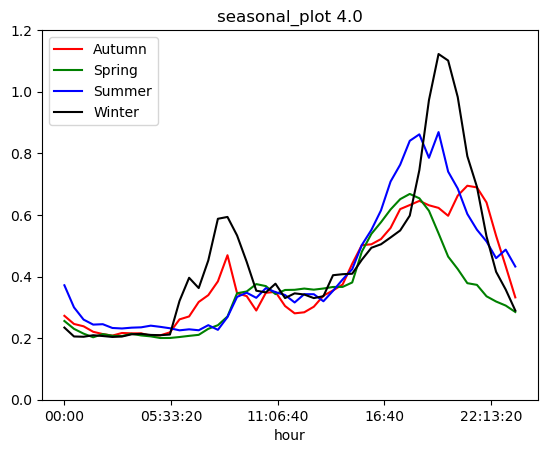

In [207]:
seasonal_visualisation(final_season_df[final_season_df['Customer'] == 4], id_vars = ['Customer', 'seasons'], value_vars = list(final_season_df.columns[3:51]))

In [155]:
df_opt

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
1,1,3.78,2076,GC,2012-07-01,1.710,1.572,1.208,1.088,1.194,...,0.658,0.748,0.894,1.098,0.272,0.576,0.362,1.302,0.180,0.136
4,1,3.78,2076,GC,2012-07-02,0.618,0.164,0.118,0.194,0.580,...,1.392,0.706,0.928,0.458,1.622,0.444,0.612,2.068,0.272,0.134
7,1,3.78,2076,GC,2012-07-03,0.184,0.152,0.636,0.176,0.122,...,0.536,0.660,1.308,0.812,0.282,0.146,0.380,1.804,0.196,0.132
10,1,3.78,2076,GC,2012-07-04,0.162,0.164,0.612,0.196,1.450,...,1.270,0.806,0.408,0.572,0.406,1.042,0.518,2.612,0.518,0.520
13,1,3.78,2076,GC,2012-07-05,0.890,0.510,0.276,0.230,0.142,...,0.416,0.480,1.012,0.474,0.514,0.924,0.828,1.864,0.140,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268543,300,3.36,2086,GC,2013-06-26,0.248,0.314,0.262,0.300,0.300,...,1.020,1.228,0.916,1.070,0.854,0.630,0.506,0.860,1.762,1.706
268546,300,3.36,2086,GC,2013-06-27,0.500,0.306,0.382,0.304,0.352,...,1.308,1.392,1.324,1.168,1.364,1.332,1.260,0.834,0.590,1.214
268549,300,3.36,2086,GC,2013-06-28,1.096,1.634,0.310,0.374,0.342,...,3.128,2.638,2.518,1.842,1.334,0.990,0.972,0.778,0.896,0.538
268552,300,3.36,2086,GC,2013-06-29,0.342,1.664,0.880,1.490,0.298,...,0.872,0.766,0.808,0.734,0.796,0.700,0.456,0.340,0.278,0.342


In [156]:
df_opt = df_opt[df_opt['Customer']==232]

arr = df_opt.iloc[0, 5:53].values
df_opt

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
206484,232,1.1,2259,GC,2012-07-01,2.576,2.838,2.888,2.776,2.750,...,3.688,2.612,2.462,2.200,0.212,0.162,0.138,0.100,0.138,0.138
206487,232,1.1,2259,GC,2012-07-02,0.076,0.138,0.126,0.076,0.138,...,2.362,2.450,2.512,2.500,2.538,2.562,2.712,2.738,2.738,2.362
206490,232,1.1,2259,GC,2012-07-03,1.300,0.126,0.126,0.100,0.112,...,2.162,2.300,2.626,2.638,2.688,1.326,0.226,0.226,0.226,0.176
206493,232,1.1,2259,GC,2012-07-04,0.212,0.200,0.188,0.188,0.212,...,4.800,4.488,3.950,3.300,0.338,0.288,0.238,0.262,0.288,0.226
206496,232,1.1,2259,GC,2012-07-05,0.250,0.276,0.238,0.238,0.262,...,2.826,3.326,3.362,3.388,2.476,1.238,1.350,1.088,0.512,0.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207564,232,1.1,2259,GC,2013-06-26,2.388,2.350,2.376,2.362,1.300,...,2.312,2.538,2.526,3.200,3.888,3.188,2.676,1.638,1.688,1.562
207567,232,1.1,2259,GC,2013-06-27,1.600,1.588,1.600,1.550,2.750,...,3.788,2.976,2.900,1.938,1.962,1.888,1.950,0.600,0.112,0.126
207570,232,1.1,2259,GC,2013-06-28,0.062,0.100,0.112,0.050,0.100,...,2.150,2.176,2.612,2.238,1.326,1.126,1.138,1.200,1.162,1.188
207573,232,1.1,2259,GC,2013-06-29,1.788,1.712,0.100,0.112,0.062,...,2.050,0.926,1.212,1.838,1.912,1.950,1.838,1.862,1.838,1.826


In [157]:
# column_to_drop = 'max_consumption'
# df_opt= df_opt.drop(column_to_drop, axis=1)
df_opt
df_daily_con = df_opt.iloc[:, 3:53].sum(axis=1)

In [158]:
melt_df_opt = pd.melt(df_opt, id_vars = ['Customer'], value_vars = list(df_opt.columns[5:53]), var_name = 'hour', value_name = 'norm_energy')

In [159]:
melt_df_opt

,Customer,hour,norm_energy
0,232,00:30,2.576
1,232,00:30,0.076
2,232,00:30,1.300
3,232,00:30,0.212
4,232,00:30,0.250
...,...,...,...
17515,232,00:00,1.562
17516,232,00:00,0.126
17517,232,00:00,1.188
17518,232,00:00,1.826


In [160]:
melt_df_opt['hour'] = pd.to_datetime(melt_df_opt['hour']).dt.time
 # Sort the DataFrame based on the 'hour' column
melt_df_opt = melt_df_opt.sort_values(by='hour')

In [161]:
melt_df_opt


,Customer,hour,norm_energy
17519,232,00:00:00,0.112
17271,232,00:00:00,0.076
17272,232,00:00:00,0.362
17273,232,00:00:00,0.200
17274,232,00:00:00,0.076
...,...,...,...
17036,232,23:30:00,0.200
17037,232,23:30:00,1.762
17038,232,23:30:00,0.526
17040,232,23:30:00,0.188


In [162]:
consumer_load = melt_df_opt['norm_energy'].values

In [163]:
# melt_df_opt['numeric_time'] = melt_df_opt['hour'].apply(lambda x: x.hour * 60 + x.minute)
# # yearly_load_data = melt_df_opt.pivot(index='Customer', columns='hour', values='norm_energy')
# # Calculate load flexibility
# # flexibility_per_interval = calculate_load_flexibility(melt_df_opt)

# # # Print or use the flexibility values as needed
# # print("Load Flexibility for Each Half-Hour Interval:")
# # print(flexibility_per_interval)
# melt_df_opt

In [164]:
def calculate_load_flexibility_max(group):
    average_load = group['norm_energy'].mean()
#     print(average_load)
    max_load = group['norm_energy'].max()
    min_load = group['norm_energy'].min()
#     print(min_load)
#     return ((max_load ) ) 
    return ((max_load - min_load )/average_load)
def calculate_load_flexibility_min(group):
    average_load = group['norm_energy'].mean()
#     print(average_load)
    max_load = group['norm_energy'].max()
    min_load = group['norm_energy'].min()
#     print(min_load)
#     return (average_load-(0.05*(max_load - min_load)) ) 
    return (min_load ) 

max_constraints = melt_df_opt.groupby('hour').apply(calculate_load_flexibility_max)
min_constraints = melt_df_opt.groupby('hour').apply(calculate_load_flexibility_min)
average_load_over_year = melt_df_opt['norm_energy'].mean()
base_cons = average_load_over_year
# total_flexibility = flexibility_per_interval.sum()
# load_flexibility_factor = total_flexibility / average_load_over_year
# Print or use the flexibility values as needed
print("Load max for Each Half-Hour Interval:")
print(max_constraints)
print("Load min for Each Half-Hour Interval:")
print(min_constraints)
# print(type(flexibility_per_interval))
max_constraints = max_constraints.values
min_constraints = min_constraints.values
# my_array
# print(load_flexibility_factor)
# print(average_load_over_year)

Load max for Each Half-Hour Interval:
hour
00:00:00     7.464731
00:30:00     7.385334
01:00:00     8.106679
01:30:00     9.494099
02:00:00    10.499287
02:30:00    11.199476
03:00:00    12.609704
03:30:00    13.115482
04:00:00    14.863714
04:30:00    15.059411
05:00:00    11.201102
05:30:00     9.340563
06:00:00     9.011245
06:30:00     8.258560
07:00:00     5.995060
07:30:00     8.895851
08:00:00     8.318455
08:30:00     9.756098
09:00:00     8.916132
09:30:00     8.665053
10:00:00     7.420844
10:30:00     7.676681
11:00:00     7.374205
11:30:00     8.467507
12:00:00     8.235817
12:30:00    10.522029
13:00:00     6.998010
13:30:00     7.521456
14:00:00     7.712674
14:30:00     7.957943
15:00:00     8.701433
15:30:00     6.887116
16:00:00     6.248592
16:30:00     5.752695
17:00:00     5.946397
17:30:00     5.447385
18:00:00     4.693439
18:30:00     5.318443
19:00:00     4.496900
19:30:00     4.005165
20:00:00     4.644734
20:30:00     4.840972
21:00:00     4.492701
21:30:00   

In [165]:
mean_df_13=melt_df_opt.groupby('hour').mean()
power_si=mean_df_13['norm_energy'].values
mean_df_13

,Customer,norm_energy
hour,,
00:00:00,232.0,0.520849
00:30:00,232.0,0.479058
01:00:00,232.0,0.421134
01:30:00,232.0,0.384449
02:00:00,232.0,0.357167
02:30:00,232.0,0.330373
03:00:00,232.0,0.296438
03:30:00,232.0,0.280279
04:00:00,232.0,0.251485


In [166]:
df_daily_con

206484    97.512
206487    77.510
206490    33.422
206493    45.238
206496    48.418
           ...  
207564    55.676
207567    58.628
207570    32.774
207573    81.816
207576    71.478
Length: 365, dtype: float64

In [167]:
import numpy as np

def calculate_flexibility_factor(actual_load):
    # Identify flexible periods (for simplicity, assuming all periods are flexible)
    flexible_periods = np.ones_like(actual_load, dtype=bool)

    # Calculate load range and average load for each flexible period
    load_range = np.max(actual_load[flexible_periods]) - np.min(actual_load[flexible_periods])
    average_load = np.mean(actual_load[flexible_periods])

    # Calculate Flexibility Factor
    flexibility_factor = load_range / average_load

    return flexibility_factor

# Example Data (replace this with your actual data)
# Assuming actual_load_data is a 1D array with 365 * 24 data points
actual_load_data = df_daily_con.values

# Calculate Flexibility Factor for the entire year
flexibility_factor = calculate_flexibility_factor(actual_load_data)

print("Load Flexibility Factor for the Year:", flexibility_factor)


Load Flexibility Factor for the Year: 3.2801323228078845


In [168]:
power_si

array([0.52084932, 0.47905753, 0.42113425, 0.38444932, 0.35716712,
       0.3303726 , 0.29643836, 0.28027945, 0.25148493, 0.23334247,
       0.29247123, 0.34259178, 0.38152329, 0.53592877, 0.67555616,
       0.54789589, 0.53952329, 0.574     , 0.57356712, 0.60311233,
       0.6064    , 0.5648274 , 0.56114521, 0.55506301, 0.51142466,
       0.49648219, 0.49299726, 0.48713973, 0.50073425, 0.49183562,
       0.52152329, 0.58253699, 0.60813699, 0.68211507, 0.79039452,
       1.0305863 , 1.33974247, 1.32820822, 1.25953425, 1.24539178,
       1.25130959, 1.29106301, 1.28296986, 1.12620822, 0.94060274,
       0.80609315, 0.69183562, 0.57742466])

In [169]:
# pip install deap

In [170]:
len(arr)
arr

array([2.576, 2.838, 2.888, 2.776, 2.75, 1.65, 0.126, 0.126, 0.1, 0.1,
       0.126, 0.112, 0.076, 0.112, 0.112, 0.088, 3.512, 3.588, 3.788,
       2.788, 2.6, 2.426, 3.788, 2.738, 2.15, 0.488, 1.562, 3.612, 3.3,
       2.826, 2.662, 3.376, 3.95, 4.712, 3.838, 3.738, 3.638, 4.026,
       3.688, 2.612, 2.462, 2.2, 0.212, 0.162, 0.138, 0.1, 0.138, 0.138],
      dtype=object)

In [171]:
len(power_si)
power_si
# Initialize a new array with zeros
result_array = np.zeros_like(power_si)
res_arr2 = np.ones_like(power_si)
result_array[0:16] = res_arr2[0:16]
result_array[32:44] = res_arr2[32:44]
GG_array = np.zeros_like(power_si)
GG_array[32:44] = res_arr2[32:44]
print(power_si)
print(GG_array)
result_array

[0.52084932 0.47905753 0.42113425 0.38444932 0.35716712 0.3303726
 0.29643836 0.28027945 0.25148493 0.23334247 0.29247123 0.34259178
 0.38152329 0.53592877 0.67555616 0.54789589 0.53952329 0.574
 0.57356712 0.60311233 0.6064     0.5648274  0.56114521 0.55506301
 0.51142466 0.49648219 0.49299726 0.48713973 0.50073425 0.49183562
 0.52152329 0.58253699 0.60813699 0.68211507 0.79039452 1.0305863
 1.33974247 1.32820822 1.25953425 1.24539178 1.25130959 1.29106301
 1.28296986 1.12620822 0.94060274 0.80609315 0.69183562 0.57742466]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [172]:
arr1= []
arr2=[]
arr3=[]
for i in range(48):
    arr1.append(power_si[i]+(0.01*max_constraints[i]*result_array[i]))
    arr2.append(power_si[i]-(0.01*max_constraints[i]*result_array[i]))
    arr3.append(power_si[i]-(0.01*max_constraints[i]*result_array[i])-(0.7*0.47395433789954*GG_array[i]))#np.abs(power_si[i]-(0.05*arr[i]))
    

In [173]:
arr2

[0.44620200561607093,
 0.4052041920678683,
 0.3400674602058511,
 0.2895083213681996,
 0.25217425704954166,
 0.21837784381248737,
 0.17034131365052038,
 0.1491246359221676,
 0.10284779537298144,
 0.08274835984758927,
 0.180460216689662,
 0.2491861540925542,
 0.29141083291165343,
 0.4533431648657805,
 0.6156055605178478,
 0.458937384145395,
 0.5395232876712328,
 0.574,
 0.5735671232876712,
 0.6031123287671233,
 0.6064,
 0.564827397260274,
 0.5611452054794521,
 0.5550630136986302,
 0.5114246575342466,
 0.4964821917808219,
 0.49299726027397256,
 0.4871397260273973,
 0.5007342465753425,
 0.4918356164383562,
 0.5215232876712329,
 0.5825369863013699,
 0.5456510647804436,
 0.6245881176713716,
 0.730930545560597,
 0.9761124548561084,
 1.2928080723103992,
 1.275023786963295,
 1.214565243029783,
 1.2053401273839282,
 1.2048622505814437,
 1.2426532929205945,
 1.2380428529087195,
 1.0655977575977034,
 0.9406027397260274,
 0.8060931506849315,
 0.6918356164383562,
 0.5774246575342465]

In [174]:
# import numpy as np

# def create_cost_function(power_values, price_signal, max_constraints, min_constraints, total_power_threshold):
#     def cost_function(variables):
#         # Clip variables to ensure they are within the specified constraints
#         variables = np.clip(variables, min_constraints, max_constraints)
# #         print(variables)
#         # Check if the total power is less than the threshold, if so, penalize the cost
#         if np.sum(variables) < total_power_threshold:
#             return np.inf  # Return a large value to discourage solutions violating the constraint
        
#         # Implement your cost function using the power values, price signal, and variables
#         return np.sum(price_signal * variables)
    
#     return cost_function

# def genetic_algorithm_with_constraints(power_values, price_signal, max_constraints, min_constraints, total_power_threshold,
#                                        population_size=100, num_generations=100):
#     # Initialization
#     population = np.random.rand(population_size, 48)  # Randomly initialize population for 48 half-hourly intervals

#     # Create the cost function with constraints
#     cost_function = create_cost_function(power_values, price_signal, max_constraints, min_constraints, total_power_threshold)

#     for generation in range(num_generations):
#         # Evaluate fitness
#         fitness_values = [cost_function(variables) for variables in population]

#         # Selection
#         selected_indices = np.argsort(fitness_values)[:population_size // 2]

#         # Crossover
#         crossover_points = np.random.randint(0, 2, size=(population_size // 2, 48), dtype=bool)
#         offspring = population[selected_indices] * crossover_points + population[np.roll(selected_indices, 1)] * ~crossover_points

#         # Mutation
#         mutation_rate = 0.1
#         mutation_mask = np.random.rand(population_size // 2, 48) < mutation_rate
#         mutation_values = np.random.rand(population_size // 2, 48)
#         offspring = np.where(mutation_mask, mutation_values, offspring)

#         # Combine parents and offspring
#         population = np.vstack([population, offspring])

#     # Find the best solution
#     best_index = np.argmin(fitness_values)
#     best_solution = population[best_index]

#     return best_solution

# # Example usage
# def get_optimal_load_with_constraints(power_values, price_signal, max_constraints, min_constraints, total_power_threshold):
#     optimal_solution = genetic_algorithm_with_constraints(power_values, price_signal, max_constraints, min_constraints, total_power_threshold,
#                                                           population_size=150, num_generations=150)

#     print("Optimal Solution:", optimal_solution)
#     # Use the closure to calculate the cost without passing variables explicitly
#     print("Optimal Cost:", create_cost_function(power_values, price_signal, max_constraints, min_constraints, total_power_threshold)(optimal_solution))
#     return optimal_solution

# # Example parameters
# power_values = power_si
# price_signal= np.array([11.76,11.76,11.76,11.76,11.76,11.76,11.76,11.76,11.76,11.76,11.76,
#                            3.99,3.99,3.99  ,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2
#                              ,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2
#                              ,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2])  # Your time-of-use pricing data
# max_constraints = arr1  # Example maximum constraints for each interval
# min_constraints = arr2 # Example minimum constraints for each interval
# total_power_threshold = np.sum(power_si)  # Example total power threshold

# # Run the example
# optimal_sol=get_optimal_load_with_constraints(power_values, price_signal, max_constraints, min_constraints, total_power_threshold)


In [175]:
# plt.plot(power_si, label='Array 1')
# plt.plot(optimal_sol, label='Array 2')

# # Adding labels and a legend
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.legend()

# # Display the plot
# plt.show()

In [176]:
# np.sum(optimal_sol)
# np.sum(power_si)

In [177]:
# pip install numpy scipy

In [178]:
import numpy as np
from scipy.optimize import minimize

# Example data
power_values = power_si  # Replace this with your actual data
price_signal = np.array([11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76,
                         3.99, 3.99, 3.99, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2,
                         67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2,
                         67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2])  # Your time-of-use pricing data

# Example constraints (you need to replace these with your actual constraints)
min_constraints = arr2
max_constraints = arr1
total_GC = np.sum(power_si)
# total_threshold = total_GC-(sum_of_values*0.1)
total_threshold = total_GC # Replace this with your actual total consumption threshold

# Define the cost function (minimize the product of power values and cost function)
def cost_function(variables):
    return np.sum(power_values * variables)

# Define the constraint function
def constraint_function(variables):
    total_consumption = np.sum(variables)
    return np.concatenate((variables - min_constraints, max_constraints - variables, [total_consumption - total_threshold]))

# Initial guess for the variables
initial_guess = np.zeros_like(power_values)

# Perform the optimization using Sequential Quadratic Programming (SQP)
result = minimize(cost_function, initial_guess, method='SLSQP', constraints={'type': 'ineq', 'fun': constraint_function})

# Optimal solution
optimal_solution = result.x

# Optimal cost (positive because the cost function is not negated)
optimal_cost = result.fun

print("Optimal Solution:", optimal_solution)
print("Optimal Cost (Energy Consumption):", optimal_cost)


Optimal Solution: [0.44620201 0.40520419 0.34006746 0.39599635 0.46215999 0.44236736
 0.4225354  0.41143427 0.40012207 0.38393657 0.40448225 0.43599741
 0.47163574 0.45334316 0.61560556 0.45893738 0.53952329 0.574
 0.57356712 0.60311233 0.6064     0.5648274  0.56114521 0.55506301
 0.51142466 0.49648219 0.49299726 0.48713973 0.50073425 0.49183562
 0.52152329 0.58253699 0.54565106 0.62458812 0.73093055 0.97611245
 1.29280807 1.27502379 1.21456524 1.20534013 1.20486225 1.24265329
 1.23804285 1.06559776 0.94060274 0.80609315 0.69183562 0.57742466]
Optimal Cost (Energy Consumption): 24.58228684861837


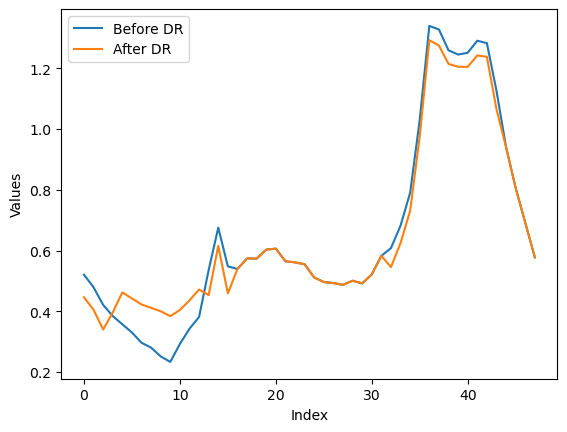

In [179]:
plt.plot(power_si, label='Before DR')
plt.plot(optimal_solution, label='After DR')

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()

In [180]:
np.sum(power_si)

31.244471232876712

In [181]:
np.sum(optimal_solution)

31.244471232873934

In [182]:
import numpy as np
from scipy.optimize import minimize
# calculating sum of pv genration
customer_232_df = selected_GG[selected_GG['Customer'] == 232]
# Sum all the columns from index 3 to 51
sum_of_columns = customer_232_df.iloc[:,3:52].sum()
sum_of_values = sum_of_columns.iloc[3:52].sum()
# Example data
power_values = power_si  # Replace this with your actual data
price_signal = np.array([11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76,
                         3.99, 3.99, 3.99, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2,
                         67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2,
                         67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2])  # Your time-of-use pricing data

# Example constraints (you need to replace these with your actual constraints)
min_constraints = arr3
max_constraints = arr1
total_GC = np.sum(power_si)
total_threshold = total_GC-(sum_of_values*0.7)
# total_threshold = total_GC # Replace this with your actual total consumption threshold

# Define the cost function (minimize the product of power values and cost function)
def cost_function(variables):
    return np.sum(power_values * variables)

# Define the constraint function
def constraint_function(variables):
    total_consumption = np.sum(variables)
    return np.concatenate((variables - min_constraints, max_constraints - variables, [total_consumption - total_threshold]))

# Initial guess for the variables
initial_guess = np.zeros_like(power_values)

# Perform the optimization using Sequential Quadratic Programming (SQP)
result = minimize(cost_function, initial_guess, method='SLSQP', constraints={'type': 'ineq', 'fun': constraint_function})

# Optimal solution
optimal_solution = result.x

# Optimal cost (positive because the cost function is not negated)
optimal_cost = result.fun

print("Optimal Solution:", optimal_solution)
print("Optimal Cost (Energy Consumption):", optimal_cost)


Optimal Solution: [0.44620201 0.40520419 0.34006746 0.39599635 0.46215999 0.44236736
 0.4225354  0.41143427 0.40012207 0.38393657 0.40448225 0.43599741
 0.47163574 0.45334316 0.61560556 0.45893738 0.53952329 0.574
 0.57356712 0.60311233 0.6064     0.5648274  0.56114521 0.55506301
 0.51142466 0.49648219 0.49299726 0.48713973 0.50073425 0.49183562
 0.52152329 0.58253699 0.21388303 0.29282008 0.39916251 0.64434442
 0.96104004 0.94325575 0.88279721 0.87357209 0.87309421 0.91088526
 0.90627482 0.73382972 0.94060274 0.80609315 0.69183562 0.57742466]
Optimal Cost (Energy Consumption): 20.19111782735849


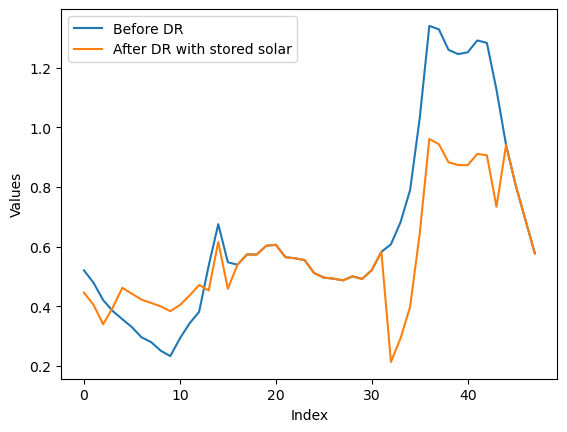

In [183]:
plt.plot(power_si, label='Before DR')
plt.plot(optimal_solution, label='After DR with stored solar')

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()

In [184]:
import numpy as np

def cost_function(variables, power_values):
    return np.sum(power_values * variables)

def move_firefly(firefly, attractive_firefly, beta0, gamma, alpha, lower_bound, upper_bound):
    distance_sq = np.sum((firefly - attractive_firefly) ** 2)
    direction = attractive_firefly - firefly
    beta = beta0 * np.exp(-gamma * distance_sq)
    epsilon = np.random.uniform(-1, 1, size=firefly.shape)
    step = alpha * (upper_bound - lower_bound) * epsilon
    new_firefly = firefly + beta * direction + step
    new_firefly = np.clip(new_firefly, lower_bound, upper_bound)  # Clip to ensure within bounds
    return new_firefly

def optimize_fireflies(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_values, total_threshold):
    fireflies = np.random.uniform(lower_bound, upper_bound, size=(population_size, num_variables))
    cost_func = lambda x: cost_function(x, power_values)
    
    for _ in range(num_iterations):
        for i in range(population_size):
            for j in range(population_size):
                if cost_func(fireflies[i]) > cost_func(fireflies[j]):
                    fireflies[i] = move_firefly(fireflies[i], fireflies[j], beta0=1.0, gamma=1.0, alpha=0.01,
                                                lower_bound=lower_bound, upper_bound=upper_bound)
        # Ensure total consumption constraint
        total_consumption = np.sum(fireflies, axis=1)
        adjustment = (total_consumption - total_threshold)[:, None] / num_variables
        fireflies -= adjustment
    
    # Find the best solution
    best_index = np.argmin([cost_func(individual) for individual in fireflies])
    best_solution = fireflies[best_index]
    return best_solution

# Example usage
population_size = 50
num_variables = 48
num_iterations = 100
lower_bound = np.array(arr2)  # Convert to NumPy array
upper_bound = np.array(arr1)  # Convert to NumPy array
total_threshold = np.sum(power_si)
best_solution = optimize_fireflies(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_si, total_threshold)
print("Optimal Solution:", best_solution)
print("Total Consumption:", np.sum(best_solution))
print("Optimal Cost:", cost_function(best_solution, power_si))


Optimal Solution: [0.48678869 0.46176077 0.46963864 0.33562212 0.35473775 0.28050387
 0.37034542 0.34125915 0.1939311  0.19824982 0.35507369 0.42378674
 0.39436316 0.51992346 0.72573122 0.48433568 0.53966901 0.57414573
 0.57371285 0.60325805 0.60654573 0.56497312 0.56129093 0.55520874
 0.51157038 0.49662792 0.49314299 0.48728545 0.50087997 0.49198134
 0.52166901 0.58268271 0.66384616 0.71639799 0.79749389 1.01055731
 1.29709304 1.31346122 1.28184733 1.2730546  1.21831629 1.24475336
 1.27834301 1.07207275 0.94074846 0.80623888 0.69198134 0.57757038]
Total Consumption: 31.244471232876712
Optimal Cost: 25.04431648024333


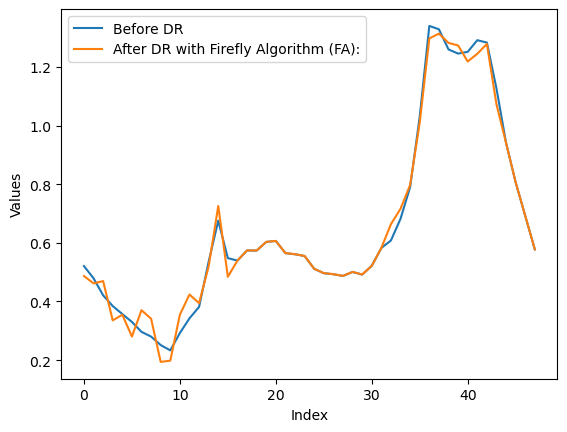

In [185]:
plt.plot(power_si, label='Before DR')
plt.plot(best_solution, label='After DR with Firefly Algorithm (FA):')

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()

In [186]:
np.sum(best_solution)

31.244471232876712

In [229]:
import numpy as np

class Particle:
    def __init__(self, num_variables, lower_bound, upper_bound):
        self.position = np.random.uniform(lower_bound, upper_bound, size=num_variables)
        self.velocity = np.random.uniform(-1, 1, size=num_variables)
        self.best_position = self.position.copy()

def cost_function(variables, power_values):
    return np.sum(power_values * variables)

def optimize_pso(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_values, total_threshold):
    particles = [Particle(num_variables, lower_bound, upper_bound) for _ in range(population_size)]
    best_global_position = None
    best_global_cost = np.inf

    for _ in range(num_iterations):
        for particle in particles:
            particle.position = np.clip(particle.position, lower_bound, upper_bound)  # Clip to enforce constraints
            cost = cost_function(particle.position, power_values)
            if cost < cost_function(particle.best_position, power_values):
                particle.best_position = particle.position.copy()
            if cost < best_global_cost:
                best_global_position = particle.position.copy()
                best_global_cost = cost

        for particle in particles:
            r1, r2 = np.random.uniform(0, 1, size=num_variables), np.random.uniform(0, 1, size=num_variables)
            particle.velocity = 0.5 * particle.velocity + r1 * (particle.best_position - particle.position) + r2 * (best_global_position - particle.position)
            particle.position = np.clip(particle.position + particle.velocity, lower_bound, upper_bound)  # Clip to enforce constraints

        total_consumption = sum(particle.position for particle in particles)
        adjustment = (total_consumption - total_threshold) / num_variables
        for particle in particles:
            particle.position -= adjustment
            particle.position = np.clip(particle.position, lower_bound, upper_bound)  # Clip to enforce constraints

    return best_global_position

# Example usage
population_size = 50
num_variables = 48
num_iterations = 100
lower_bound = np.array(arr2)  # Convert to NumPy array
upper_bound = np.array(arr1)  # Convert to NumPy array
total_threshold = np.sum(power_si)
best_solution = optimize_pso(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_si, total_threshold)
print("Optimal Solution:", best_solution)
print("Total Consumption:", np.sum(best_solution))
print("Optimal Cost:", cost_function(best_solution, power_si))


Optimal Solution: [0.5321294  0.55291088 0.50220103 0.47939031 0.46215999 0.44236736
 0.4225354  0.41143427 0.40012207 0.38393657 0.40448225 0.43599741
 0.47163574 0.55504342 0.61560556 0.53549257 0.53952329 0.574
 0.57356712 0.60311233 0.6064     0.5648274  0.56114521 0.55506301
 0.51142466 0.49648219 0.49299726 0.48713973 0.50073425 0.49183562
 0.52152329 0.58253699 0.56640842 0.62458812 0.73093055 0.97611245
 1.29280807 1.27502379 1.21456524 1.20534013 1.20486225 1.24265329
 1.23804285 1.06559776 0.94060274 0.80609315 0.69183562 0.57742466]
Total Consumption: 31.92264563963743
Optimal Cost: 24.907214503130874


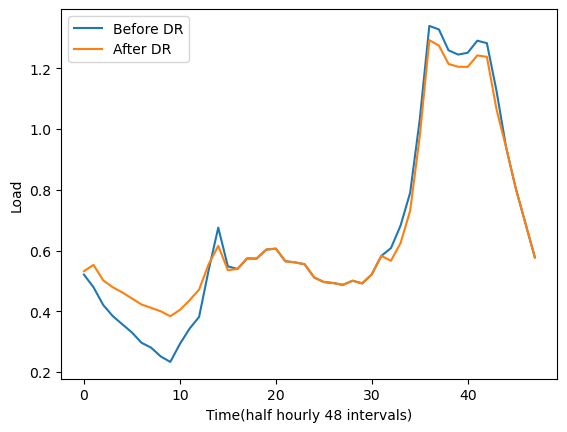

In [230]:
plt.plot(power_si, label='Before DR')
plt.plot(best_solution, label='After DR')  # PSO

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()

In [189]:
np.sum(best_solution)

31.908717432000852

constaraint hourwise :
hour
00:00:00     7.464731
00:30:00     7.385334
01:00:00     8.106679
01:30:00     9.494099
02:00:00    10.499287
02:30:00    11.199476
03:00:00    12.609704
03:30:00    13.115482
04:00:00    14.863714
04:30:00    15.059411
05:00:00    11.201102
05:30:00     9.340563
06:00:00     9.011245
06:30:00     8.258560
07:00:00     5.995060
07:30:00     8.895851
08:00:00     8.318455
08:30:00     9.756098
09:00:00     8.916132
09:30:00     8.665053
10:00:00     7.420844
10:30:00     7.676681
11:00:00     7.374205
11:30:00     8.467507
12:00:00     8.235817
12:30:00    10.522029
13:00:00     6.998010
13:30:00     7.521456
14:00:00     7.712674
14:30:00     7.957943
15:00:00     8.701433
15:30:00     6.887116
16:00:00     6.248592
16:30:00     5.752695
17:00:00     5.946397
17:30:00     5.447385
18:00:00     4.693439
18:30:00     5.318443
19:00:00     4.496900
19:30:00     4.005165
20:00:00     4.644734
20:30:00     4.840972
21:00:00     4.492701
21:30:00     6.061046
22:0

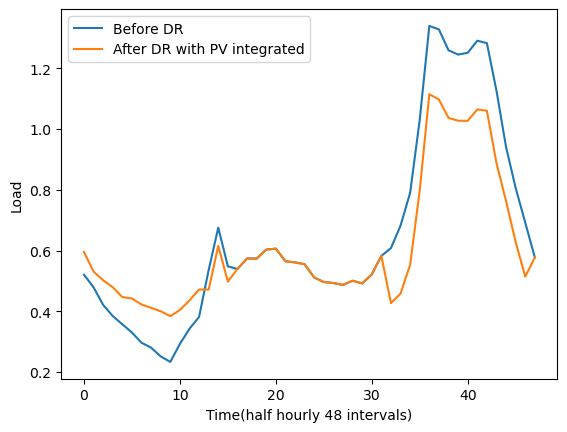

In [215]:
# for general any customer 
c = 232
# melting the data frame for a customer

df_opt = df_temp[df_temp['Customer']==c]
# arr = df_opt.iloc[0, 5:53].values
df_opt
melt_df_opt = pd.melt(df_opt, id_vars = ['Customer'], value_vars = list(df_opt.columns[5:53]), var_name = 'hour', value_name = 'norm_energy')
  # hours to date time format
melt_df_opt['hour'] = pd.to_datetime(melt_df_opt['hour']).dt.time
  # Sort the DataFrame based on the 'hour' column
melt_df_opt = melt_df_opt.sort_values(by='hour')
consumer_load = melt_df_opt['norm_energy'].values

# for flexibility 

def calculate_load_flexibility_max(group):
    average_load = group['norm_energy'].mean()
#     print(average_load)
    max_load = group['norm_energy'].max()
    min_load = group['norm_energy'].min()
#     print(min_load)
#     return ((max_load ) ) 
    return ((max_load - min_load )/average_load)

constraints = melt_df_opt.groupby('hour').apply(calculate_load_flexibility_max)

print("constaraint hourwise :")
print(constraints)
constraints = constraints.values

# mean of customer
mean_df_13=melt_df_opt.groupby('hour').mean()
print(mean_df_13)
power_si=mean_df_13['norm_energy'].values
mean_df_13

# timing arrays respectivel to cluster 2 and 0
len(power_si)
# print(power_si)
# Initialize a new array with zeros
result_array = np.zeros_like(power_si)
res_arr2 = np.ones_like(power_si)
result_array[0:16] = res_arr2[0:16]   # peak undershoot
result_array[32:44] = res_arr2[32:44]  # peak overshoot
GG_array = np.zeros_like(power_si)
GG_array[32:48] = res_arr2[32:48]   # peak overshoot for solar
print(power_si)
print(GG_array)
result_array

#  max and min contraints 

arr1= []  #for max const 
arr2=[]   #for min const 
arr3=[]   #for min const with solar
# for solar
customer_232_df = selected_GG[selected_GG['Customer'] == c]
# Sum all the columns from index 3 to 51
sum_of_columns = customer_232_df.iloc[:,3:52].sum()
sum_of_values = sum_of_columns.iloc[3:52].sum()
value_pv = (sum_of_values/16) # as there are 12 peak instance 
a = 0
for i in range(48):
    arr1.append(power_si[i]+(0.01*constraints[i]*result_array[i]))
    arr2.append(power_si[i]-(0.01*constraints[i]*result_array[i]))
    if (power_si[i]-(0.01*constraints[i]*result_array[i])-(0.5*value_pv*GG_array[i]))>0:
        a = a+(0.5*value_pv*GG_array[i])
        arr3.append(power_si[i]-(0.01*constraints[i]*result_array[i])-(0.5*value_pv*GG_array[i]))#np.abs(power_si[i]-(0.05*arr[i]))
         
    else:
        arr3.append(power_si[i]-(0.01*constraints[i]*result_array[i]))
        
        
print(arr3)
# code for algo optimization
import numpy as np

class Particle:
    def __init__(self, num_variables, lower_bound, upper_bound):
        self.position = np.random.uniform(lower_bound, upper_bound, size=num_variables)
        self.velocity = np.random.uniform(-1, 1, size=num_variables)
        self.best_position = self.position.copy()

def cost_function(variables, power_values):
    return np.sum(power_values * variables)

def optimize_pso(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_values, total_threshold):
    particles = [Particle(num_variables, lower_bound, upper_bound) for _ in range(population_size)]
    best_global_position = None
    best_global_cost = np.inf

    for _ in range(num_iterations):
        for particle in particles:
            particle.position = np.clip(particle.position, lower_bound, upper_bound)  # Clip to enforce constraints
            cost = cost_function(particle.position, power_values)
            if cost < cost_function(particle.best_position, power_values):
                particle.best_position = particle.position.copy()
            if cost < best_global_cost:
                best_global_position = particle.position.copy()
                best_global_cost = cost

        for particle in particles:
            r1, r2 = np.random.uniform(0, 1, size=num_variables), np.random.uniform(0, 1, size=num_variables)
            particle.velocity = 0.5 * particle.velocity + r1 * (particle.best_position - particle.position) + r2 * (best_global_position - particle.position)
            particle.position = np.clip(particle.position + particle.velocity, lower_bound, upper_bound)  # Clip to enforce constraints

        total_consumption = sum(particle.position for particle in particles)
        adjustment = (total_consumption - total_threshold) / num_variables
        for particle in particles:
            particle.position -= adjustment
            particle.position = np.clip(particle.position, lower_bound, upper_bound)  # Clip to enforce constraints

    return best_global_position

# Example usage
population_size = 50
num_variables = 48
num_iterations = 100
# without solar
# total_threshold = np.sum(power_si)
# lower_bound = np.array(arr2)  # Convert to NumPy array

upper_bound = np.array(arr1)  # Convert to NumPy array
# with solar
lower_bound = np.array(arr3) 
total_threshold = np.sum(power_si)-(a)
best_solution = optimize_pso(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_si, total_threshold)
print("Optimal Solution:", best_solution)
print("Total Consumption before:", np.sum(power_si))
print("Total Consumption after:", np.sum(best_solution))
print("Cost Before:", cost_function(power_si, price_signal))
print("Optimal Cost:", cost_function(best_solution, price_signal))

# print("Optimal Solution:", optimal_solution)
# # print("Optimal Cost (Energy Consumption):", optimal_cost)

# plotting solution
plt.plot(power_si, label='Before DR')
plt.plot(best_solution, label='After DR with PV integrated')

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()
